In [1]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import pandas as pd
import numpy as np
import requests
import datetime

#read cleaned csv file
file_path = "Data/Clean/cleaned_data.csv"
df = pd.read_csv(file_path)
df.head()

,date,time,area,district,victim_Age,victim_sex,victim_race,premise,address,cross_street,zip,hour,month,weekday,lat,lon
0,2019-06-22,1150,Mission,1985,32.0,M,Hispanic,101.0,PARTHENIA ST,TOBIAS AV,19730.0,11,6,Friday,34.2279,-118.4516
1,2019-06-22,1600,Southwest,357,27.0,M,Hispanic,101.0,JEFFERSON,CATALINA,22724.0,16,6,Friday,34.0255,-118.2937
2,2019-06-22,650,West Valley,1001,20.0,F,Hispanic,101.0,ROSCOE,SHIRLEY,18909.0,6,6,Friday,34.2204,-118.5579
3,2019-06-22,525,Topanga,2145,44.0,F,Hispanic,101.0,VICTORY BL,SHOUP AV,4278.0,5,6,Friday,34.1865,-118.6146
4,2019-06-22,245,N Hollywood,1543,43.0,F,Hispanic,101.0,LAUREL CANYON BL,MAGNOLIA BL,8890.0,2,6,Friday,34.1649,-118.3965


In [19]:
df1 = df.copy()
df1.hour.dropna()
df1 = df1[['weekday','hour','lat']]
df1 = df1.groupby(['weekday','hour'])
df1 = df1.count()
df1.reset_index(level=1,inplace=True)
df1.reset_index(level=0,inplace=True)
df1=df1.rename(columns={'lat':'count'})
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1['weekday'] = df1['weekday'].astype('category', categories=cats, ordered=True)
df1 = df1.sort_values(by=['weekday','hour'])
df1.head(24)

,weekday,hour,count
0,Monday,0,1163
1,Monday,1,923
2,Monday,2,789
3,Monday,3,521
4,Monday,4,422
5,Monday,5,768
6,Monday,6,1528
7,Monday,7,3805
8,Monday,8,4122
9,Monday,9,3444


In [20]:
data = pd.pivot_table(df1, values = 'count',index=['weekday','hour'])
data = data.unstack(level = 0)
data

count                                                  
weekday Monday Tuesday Wednesday Thursday Friday Saturday Sunday
hour                                                            
0         1163    1228      1323     1538   2488     2985   1553
1          923     991      1130     1346   2444     2918   1263
2          789     885      1022     1381   2955     3335   1181
3          521     586       645      830   1784     2217    792
4          422     468       491      605   1180     1312    602
5          768     739       720      885    999     1009    828
6         1528    1549      1602     1524   1081      972   1524
7         3805    3699      3758     3360   1492     1131   3376
8         4122    4107      4037     3782   1863     1413   3756
9         3444    3285      3209     3153   2267     1768   3073
10        3217    3155      3118     3140   2819     2378   2999
11        3301    3290      3254     3380   3163     2725   3177
12        3811    3834      3713     3954   3785     3011   3768
13        3998    3744      3703     4194   3805     3344   3681
14        4180    4114      4145     4499   4057     3606   4124
15        4519    4494      4670     5246   4003     3480   4569
16        4520    4517      4629     5081   3749     3344   4372
17        4977    5066      5131     5421   3835     3563   4865
18        4567    4769      4768     5128   3872     3408   4398
19        3594    3791      3693     4242   3690     3246   3297
20        2763    2906      3015     3696   3561     3420   2723
21        2491    2562      2762     3335   3457     3073   2420
22        2070    2211      2400     3140   3299     2556   1966
23        1746    1848      2111     3045   3304     2158   1715

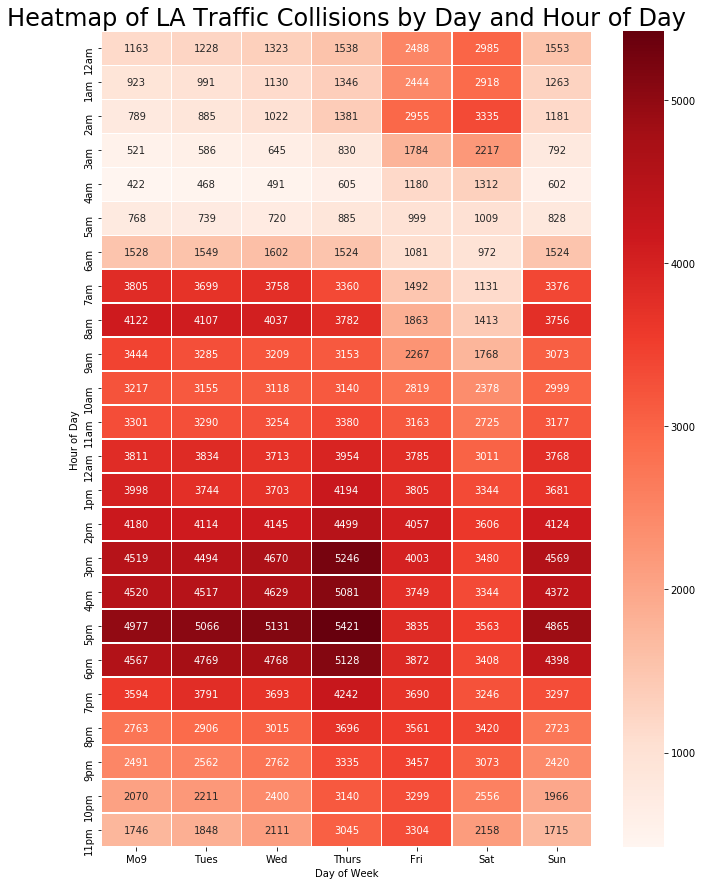

In [31]:
import seaborn as sns
day_short_names = ['Mo9', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
detailed_hours = ['12am', '1am', '2am', '3am', '4am', '5am', '6am','7am','8am','9am',
                 '10am','11am','12am','1pm', '2pm', '3pm', '4pm', '5pm', '6pm','7pm','8pm','9pm',
                 '10pm','11pm']
#plot the heatmap
fig,ax = plta.subplots(figsize=(11,15))
ax = sns.heatmap(data, annot=True, fmt="d", linewidths=.5,cmap="Reds",
                 ax=ax,xticklabels=day_short_names,yticklabels=detailed_hours)

#set labels
ax.axes.set_title("Heatmap of LA Traffic Collisions by Day and Hour of Day", fontsize=24, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour of Day');

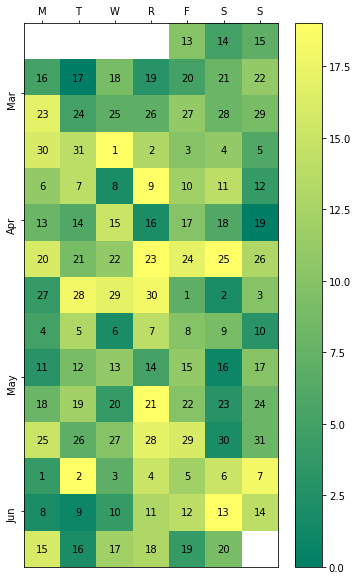

In [84]:
# def main():
#     dates, data = generate_data()
#     fig, ax = plt.subplots(figsize=(6, 10))
#     calendar_heatmap(ax, dates, data)
#     plt.show()

# def generate_data():
#     num = 100
#     data = np.random.randint(0, 20, num)
#     start = dt.datetime(2015, 3, 13)
#     dates = [start + dt.timedelta(days=i) for i in range(num)]
#     return dates, data

# def calendar_array(dates, data):
#     i, j = zip(*[d.isocalendar()[1:] for d in dates])
#     i = np.array(i) - min(i)
#     j = np.array(j) - 1
#     ni = max(i) + 1

#     calendar = np.nan * np.zeros((ni, 7))
#     calendar[i, j] = data
#     return i, j, calendar


# def calendar_heatmap(ax, dates, data):
#     i, j, calendar = calendar_array(dates, data)
#     im = ax.imshow(calendar, interpolation='none', cmap='summer')
#     label_days(ax, dates, i, j, calendar)
#     label_months(ax, dates, i, j, calendar)
#     ax.figure.colorbar(im)

# def label_days(ax, dates, i, j, calendar):
#     ni, nj = calendar.shape
#     day_of_month = np.nan * np.zeros((ni, 7))
#     day_of_month[i, j] = [d.day for d in dates]

#     for (i, j), day in np.ndenumerate(day_of_month):
#         if np.isfinite(day):
#             ax.text(j, i, int(day), ha='center', va='center')

#     ax.set(xticks=np.arange(7), 
#            xticklabels=['M', 'T', 'W', 'R', 'F', 'S', 'S'])
#     ax.xaxis.tick_top()

# def label_months(ax, dates, i, j, calendar):
#     month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
#                              'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#     months = np.array([d.month for d in dates])
#     uniq_months = sorted(set(months))
#     yticks = [i[months == m].mean() for m in uniq_months]
#     labels = [month_labels[m - 1] for m in uniq_months]
#     ax.set(yticks=yticks)
#     ax.set_yticklabels(labels, rotation=90)
